# **1. Introduction**


<p align = "justify">In outer space, we are having many objects where some of them are very near to us more than our imagination. On the astronomical scale, having those objects less than 70 thousand km are not much harmful to us, but sometimes they can be harmful to us. So, it is wise to know which asteroids can be harmful to us and which not. From this motivation, we try to develop a machine learning model, that can classify the asteroids which are harmful and which are not based on their characteristics and behavior, we call it features in machine learning term.</p>

#### **1.1 Dataset Collection and Description**
<p align= "justify"> Dataset name is <b>NASA - Nearest Earth Objects</b> and this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object. I collect this dataset from https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects and the uploader is "SAMEEP VANI". I go through the Kaggle website and click the dataset option. From where I filter the dataset based on classification problem and hottness, and I found this dataset at the top on this site. The dataset contains two files(<b>neo</b> and <b>new_v2</b>) where I do my work on the updated dataset.

![picture](https://drive.google.com/uc?export=view&id=1w5BDXrfLiGsvy0S8hOvQpJTnvTsVWDNP)


In this NASA dataset, there are in total 10 columns and 90836 rows. Columns name are given below with bold color <br>
1. **id** : Unique Identifier for each Asteroid
2. **name**: Name given by NASA
3. **est_diameter_min** : Minimum Estimated Diameter in Kilometres
4. **est_diameter_max** : Maximum Estimated Diameter in Kilometres
5. **relative_velocity** : Velocity Relative to Earth in Kmph
6. **miss_distance** : Distance in Kilometres missed
7. **orbiting_body** : Planet that the asteroid orbits
8. **sentry_object** : Included in sentry - automated collision monitoring system
9. **absolute_magnitude** : Describes intrinsic luminosity
10. **hazardous** : Boolean feature that shows whether asteroid is harmful or not

In this dataset, our target/label column is hazardous which tell us that an asteroid is harmfull or not by boolean value.
</p>

# **2. Methodology**

<p allign = "justify">In the section we will discuss our methodology part. We have divided this part in some subsection.<br>
<ul type = "I">
  <li> Preliminary Analysis</li>
  <li> Exploratory Data Analysis (EDA) </li>
  <li> Pre-processing </li>
  <li> Training the Model Using ML Algorithms </li>
  <li> Evalution the Model Using Various Metrices</li>
</ul>
</p>


## 2.1 Preliminary Analysis


<p align = "justify"> In this subsection, we are going to anysis our data brifly.</p>

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

In [2]:
#loading the data. I work my project on colab and I upload my dataset on google drive
#so that I do not need to upload my dataset again and again as colab removes the dataset after registering the kernel
path = '/content/drive/MyDrive/Datasets/nasa nearest earth object detection/neo_v2.csv'
df = pd.read_csv(path)  

In [3]:
#So, far I load my dataset. Now I am going to analysis my dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


<p align= "justify">We can see that in my dataset, there are 10 columns where <b>'sentry_object'</b> and <b>'hazardous'</b> are boolean types, <b>'name'</b> and <b>'orbiting_body'</b> are object types,and <b>'id'</b> is int64 type. and finally <b>'est_diameter_min'</b>, <b>'est_diameter_max'</b>, <b>'relative_velocity'</b>, <b>'miss_distance'</b>, and <b>'absolute_magnitude'</b> are float64. So, we are having different types of data. In total our dataset 90836 entries and good to know that we do not have any null value of this

</p>

In [4]:
#checking the probalility of each class
probabilityOfHazardous = sum(df.hazardous) / len(df.hazardous)
print("Probability of Hazardous is :",probabilityOfHazardous*100,"%")
print("Probability of not Hazardous is :",(1 - probabilityOfHazardous)*100,"%")

Probability of Hazardous is : 9.731824386806993 %
Probability of not Hazardous is : 90.26817561319301 %


<p align = "justify" >In out target class, we have bool value that means we have True and False value. Without using any machine learning model if I say all asteroids are hardour thare is a probability of this 9.7 %. It is ok as we are not applying any machine learning knowledge here. But, what happends if we say all asteriods are not hazardious? if we say that then our prediction probability will be 90% true. that is now okay now. Let's go ahead that if we can develop that it will give good probability in both predition.</p?

In [5]:
#let's look 10 data from the dataset for getting some ideas
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [6]:
#let's describe our dataset in statistical views for only numerical features
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


<p align= "justify">In our dataset, we can see that <b>est_diameter_min</b> varies between 0.0006089126 and 37.8926498379 but 75% data belongs to 0.1434 ranges while max is 37.89 so we have some outlier of this as having standard deviation 0.298511. In the 'est_diameter_max', ranges between 0.00136157 and 84.7305408852 where 75% data belongs to 0.320656449 ranges, so it also has some outlier as we see the standard devition is 0.66749. ranges between 203.34643253 and 236990.1280 where 75% data belongs to 62923.604 in 'relative_velocity' and standart devition is 25293.2969. If we see in the 'miss_distance' features, we see data varies between 6745.532515957 and 74798651.4521972. Its 75% data belongs to 56548996.45 range and standard deviation is 22352040.599. In the 'absolute_magnitude' feature, minimun value is 9.23 and maximum value is 33.2 where 75% data is max 25.7 value. Standard deviation of this feature is 2.8940.</p?

## 2.2 Exploratory Data Analysis (EDA)

<b> 2.2.1 We are going to see the ratio of each class in the dataset using pie chart.</b>

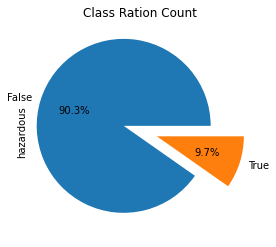

In [7]:
df['hazardous'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.2, 0.2], title="Class Ration Count")

<p align="justify"> Dataset contains 90.3% data are False label data and only 9.7% data are True label that we can clearly see in the pie chart. From this analysis, we can say that this is this is imbalance dataset. We have to handle this, otherwise, we learn from our <b>AI course Ma336 </b>that, if we give the <b>imbalance dataset</b> It would go towards <b>bias</b>. </p>

<b>2.2.2 Now we will see the dataset using pairploting by helping the seaborn library based on Hazard columns</b>

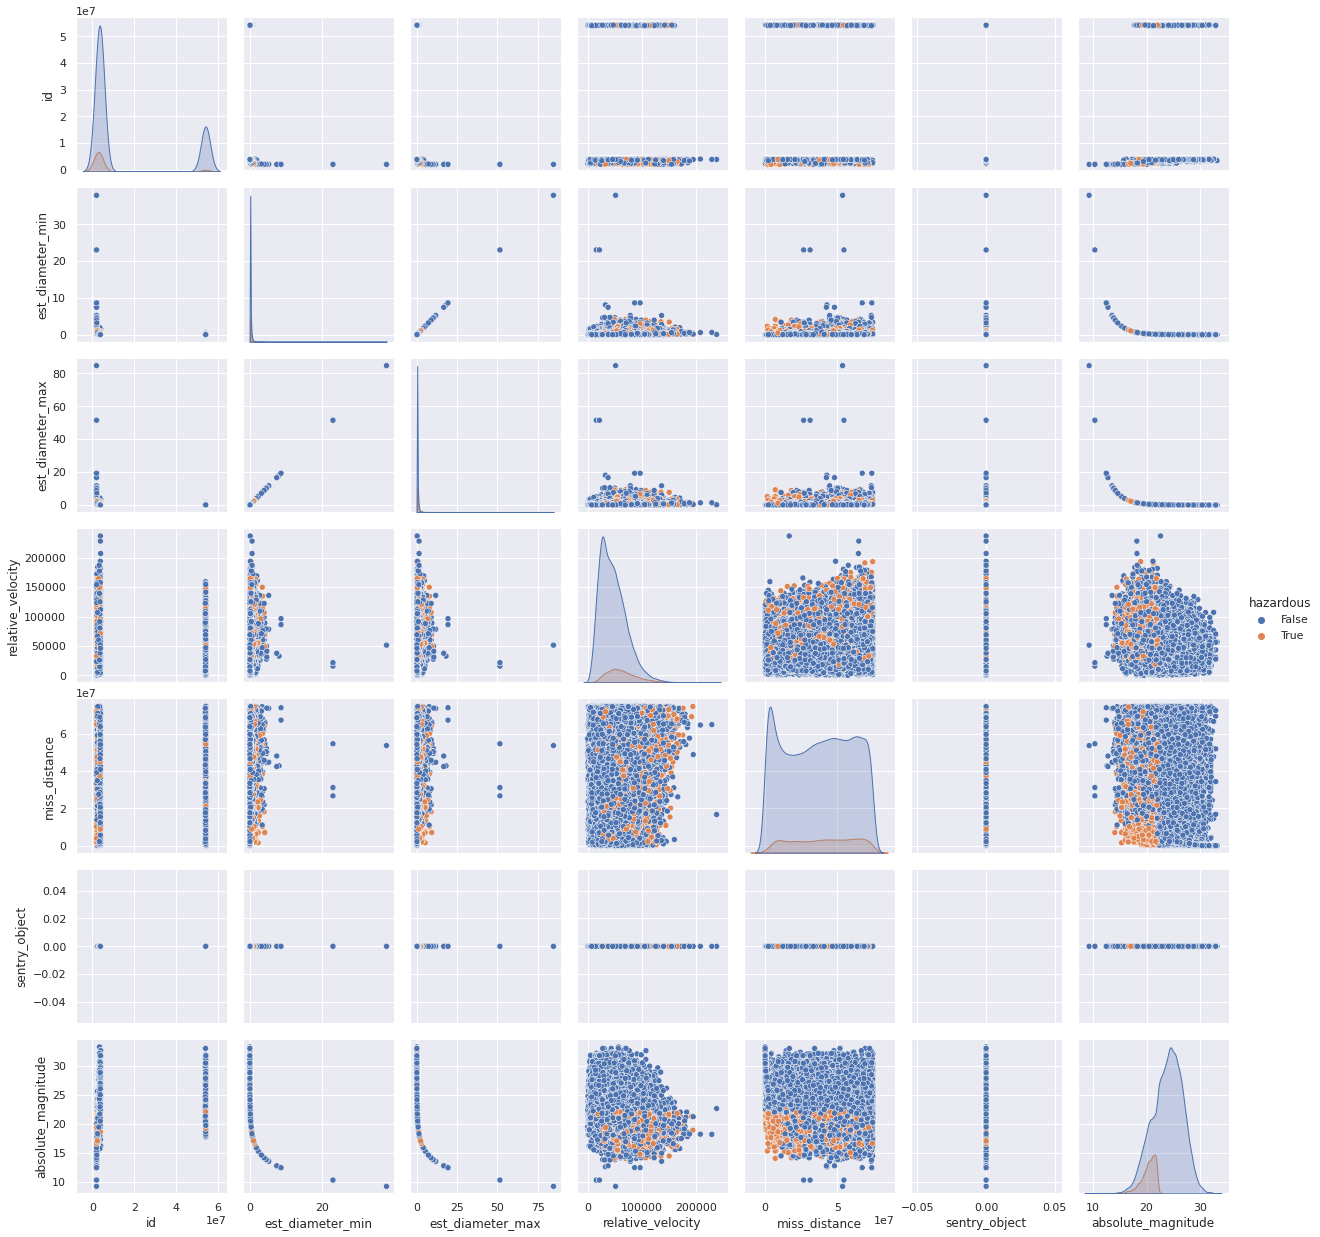

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(df,hue='hazardous')

<p align= "justify" >If we see our pair plot we can clearly see that there is a linear relationship  between est_diameter_min and est_diameter_max. We know that if one feature is correlated with another feature, we call it collinearity that we learn from Ma317 course. That is bad for the model. So, we can drop one feature between them. Also, we can see that 'sentry_object' feature having constant relationship among all features because it has only one value(False).</p>

<b> 2.2.3. Let's see Correlation diagram among the features of the NASA dataset

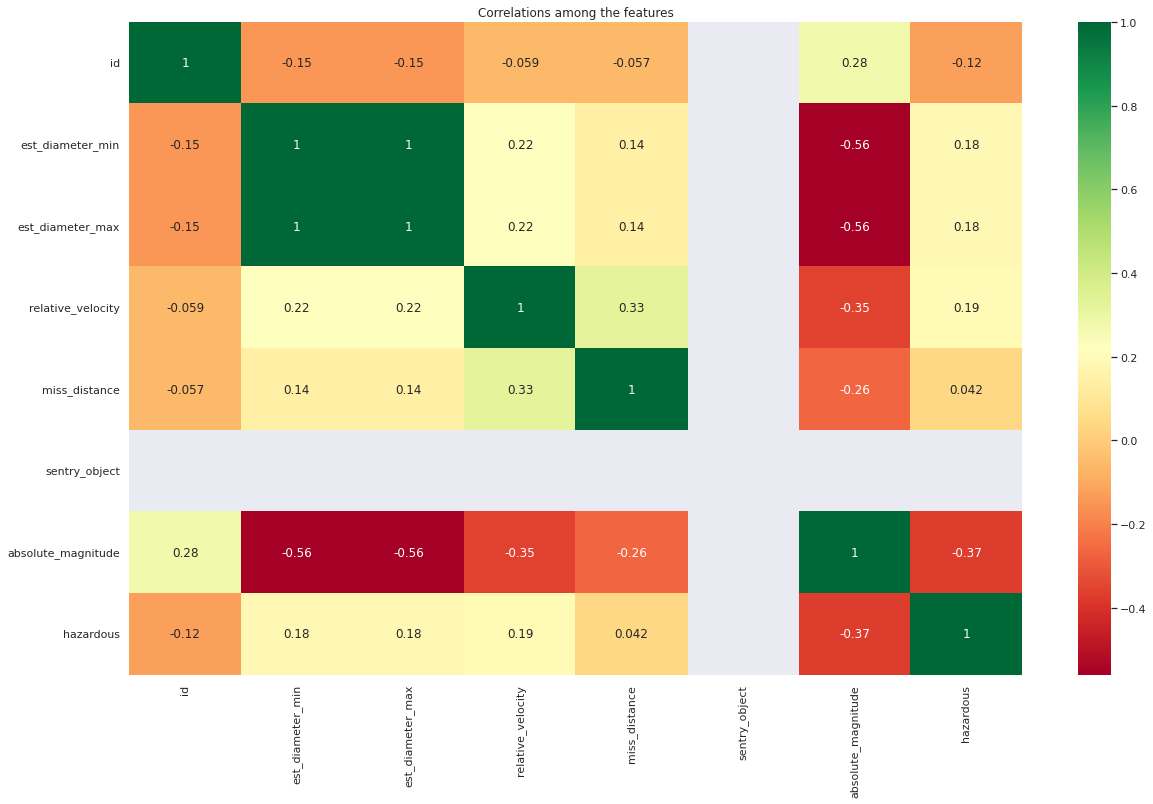

In [9]:
#corelation diagram
sns.heatmap(data=df.corr(), annot=True, cmap="RdYlGn")
figure=plt.gcf()
figure.set_size_inches(20,12)
plt.title("Correlations among the features")
plt.show()

<p align = "justify">In the above diagram we say that there is a linear relation between 'est_diameter_min' and 'est_diameter_max' and they are corelated to each other that we can see from the corelation diagram. Also, we can can that there is no color for sentry_object because of having only one value which is False.</p>

**2.2.4 Now we will see the plot of each numeric featue's plot diagrame based on their range with the Hazardous class label**

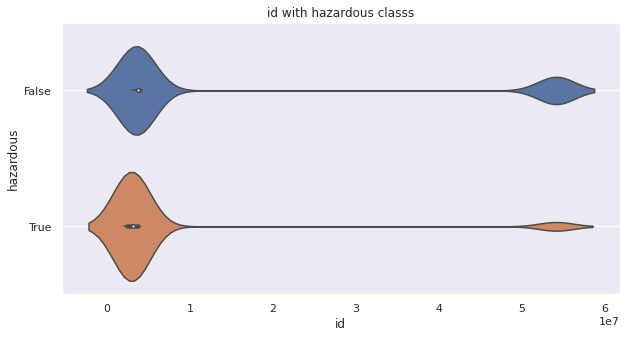

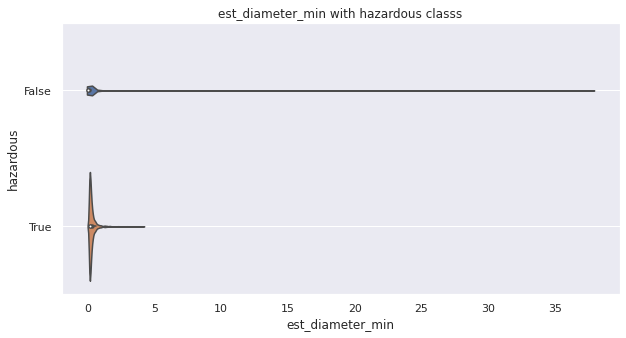

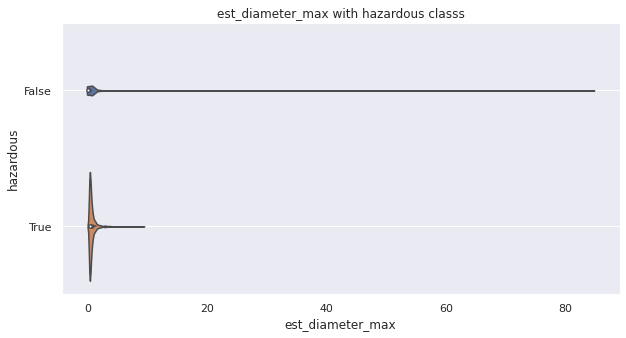

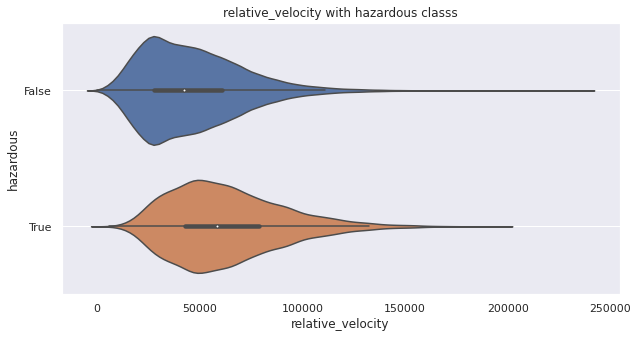

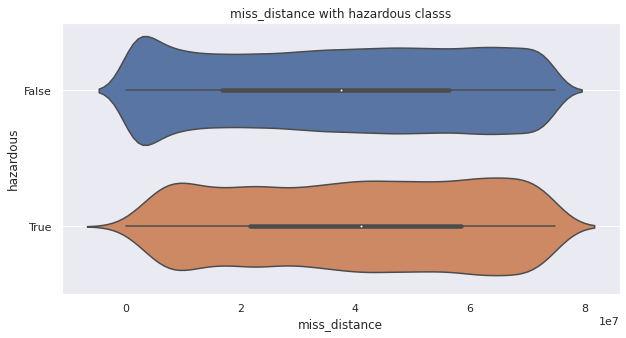

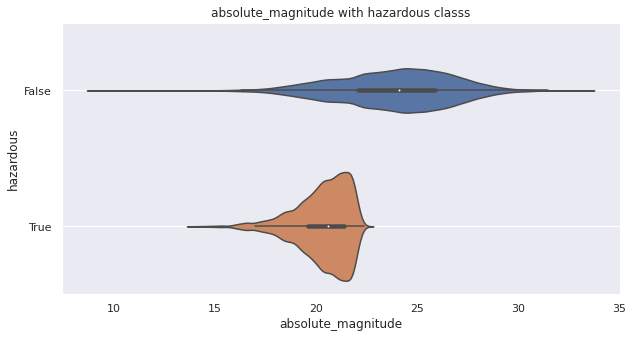

In [10]:
numeric_features = ['id','est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
for each_feature in numeric_features:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df, x=each_feature, y='hazardous',split=True, orient='h')
    title = each_feature + ' with hazardous classs'
    plt.title(title)
    plt.grid()


<p align='justify'>From this plot, we can analysis something. If we see that in the 'est_diameter_min' and 'est_diameter max' both having more higher range in False class, but if we truly observed that most of the 'False' class range is less than True class even though Hazardous False class has 9 times more data than True class. So we may say that having small 'est_diameter_min' there is good possibility for being Non Hazardous or False class otherwise True class or Hazardous . For absolute magnitude, False class having higher value where True class having less higher value. So, here it may help that having higher vaue there is more probability for being Non hazardous astroid. For miss_distance, True class having more long ranges value than False class. For relative velocity, though False class level has varies different ranges but deeply True class has more higher value. So, higher value of relative_velocity, there is higher possibility of being Hazardous class or True class</p>

## 2.3 Pre-Processing

**2.3.1 Basic pre-processing**

<p align= 'justify'> In this sub-section we will do some pre-processing like checking null values, handling the categorical features, and so on.<br>
<b> Null Value:</b> We see in the above section 2.1 analysis that we do not have any null value in our dataset. <br>
<b> checking One Unique value:</b> We can see below that we have only one unique value of two features. One is orbiting_body which is 'Earth' and	sentry_object	having False value.</p>



In [11]:
# For checking each features that having only one single value
for col in df.columns:
  if len(df[col].unique())==1:
    print(col)

orbiting_body
sentry_object


<p align='justify'><b>Handaling the Categorical Feature:</b> In the 2.1 preliminary analysis we see that we are having three categorical columns. One is orbiting_body, sentry_object(though boolean it is like category), and last one is Hazardous(boolean type but we consider as two category True and False). We do not need to handle the orbiting_body and sentry_object as having only one value. We are now handaling our target variable in the below code.</p>

In [12]:
# this code will convert the boolean value into 0 and 1.
# For true it would be 1 and for false it would be 0.
df["hazardous"] = df["hazardous"].astype(int) 

**2.3.2 Handle imbalance dataset**

<p align='justify'>We, have noticed in the Exploratory data analysis that our data is imbalance which is almost 9:1. We know from the course that, if our dataset is imbalance or we are not giving the enough data, then our model will go towards the biasness that we never want. To get rid of this bias problem, we are using a very populor method for handaling imbalance dataset. We are using <b>SMOTE</b> oversampling method. We are not using Random oversampling method for our model as it just copy the data and increase the data size while smote uses some machine learning algorithm like knn to balance the dataset. This is why we prefer SMOTE method to balance our dataset.</p>

In [13]:
# dividing the target and features
features = ['est_diameter_min','est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude']
X = df[features]
y = df['hazardous']
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_new, y_new = SM.fit_resample(X,y) 

**2.3.3 Features Selection**

<p align='justify'>In this section, we will select our features for the model. We have in total 9 faetures and one target variable. All_features are (<b>'id','name','est_diameter_min','est_diameter_max','relative_velocity','miss_distance','orbiting_body','sentry_object','absolute_magnitude'</b>)
<br><br>
<b>i. Features selection using statistical knowledge</b>
<br><br><ui>
<b><li>id: </b> Can not be a feature because it is used for uniquely identified of an asteroid</li>
<b><li>name:</b> can not be a feature because it does not carry any pattern and does not have any charactic that will help ML model to predict something.</li>
<b><li>est_diameter_min</b> and <b>est_diameter_max: </b> Both having linear relationship and each other correlated, so if we take both we will have collinearity problem. So, we can take _est_diameter_max as a feature.</li>
<b><li>relative_velocity: </b> We can take it as features as it does not make any collinearity problem and can be a good feature that we discuss on the EDA part</li>
<b><li>miss_distance:</b> Miss distance can be a good features and why we discussed at EDA part.</li>
<b><li>orbiting_body: </b> Can not be a feature because of having only one value</li>
<b><li>sentry_object: </b> Can not be a feature because of having only one value</li>
<b><li>absolute_magnitude: </b> it may be a good predictor that has been discussed on EDA part</li>
 </p>

In [14]:
#Features are selected using basic analysis of the dataset
features = ['est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude']

<p align='justify'><b>ii. Feature selection using Genetic Algorithm</b>
So far, In the above, using the statistical knowledge on the dataset, we have filtered some attributes. Now we will check these attributes that are really important in our model or we should filter more for better our model. For doing this, we have seleted the Genetic algorithm as we studied this a search problem in the AI course. Now, we will use it for selecting the features. </p>

In [ ]:
#!pip install sklearn-genetic

In [16]:

from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
GA = GeneticSelectionCV(RF,cv=4,verbose=2,scoring="accuracy",max_features=4,n_population=50,
        crossover_proba=0.5,mutation_proba=0.2,n_generations=40,crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,tournament_size=3,n_gen_no_change=10,caching=True,
        n_jobs=-1,
    )
selector = GA.fit(X_new, y_new)
print(selector.support_)
# I run this on my rough project but while presentation i unfortunetly click the run all. it takes to much times more than 2 hours.
# but it's output shows true value for what i selected for features.

<p align= 'justify'>In the genetic algorithm,  we see that what we select using statistical knowledge, these are the best features. So, final features are,

In [17]:
#final features are
features = ['est_diameter_min','est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude']




## 3.Training the Model Using ML Algorithms

<p align='justify'>In this section, we will try to built our model using different types of machine learning algorithms. Specially, we will focus on Random forest classifier, Decision tree classifiers,  K nearest neiboughs, Naive bayes, K mean clustering, and Artificial Neural Network for deep learning model. Before training the model we will split our dataset into training and testing. For training part, we will use training dataset and using test dataset we will test our model.</p>

###3.1 Tradition Machine Learning

In [19]:
#import the machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans


In [20]:
#define the model
RF = RandomForestClassifier()
DC = DecisionTreeClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
NB = GaussianNB()
KM = KMeans()


In [ ]:
# Cross Validation scores of each model
from sklearn.model_selection import cross_validate
scores_RF = cross_validate(RF, X_new, y_new, cv=4,scoring=('precision','recall','f1','roc_auc'))
scores_DC = cross_validate(DC, X_new, y_new, cv=4,scoring=('precision','recall','f1','roc_auc'))

scores_KNN = cross_validate(KNN, X_new, y_new, cv=4,scoring=('precision','recall','f1','roc_auc'))
scores_NB = cross_validate(NB, X_new, y_new, cv=4,scoring=('precision','recall','f1','roc_auc'))
scores_KM = cross_validate(KM, X_new, y_new, cv=4,scoring=('precision','recall','f1','roc_auc'))

###3.2 Deep Learning

In [24]:
#import the library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow

In [25]:
#baseline model for deep learning
# we use two layers for hidden layer where each having 20 neurons
#for hidden layer, we use relu as an activation function
#for the output layer we use sigmoid as a activation function as we have binary classification problem
model = Sequential([
      tensorflow.keras.layers.Flatten(input_shape = (len(features),)),
      Dense(20,activation=tensorflow.nn.relu),
      Dense(20,activation=tensorflow.nn.relu),
      Dense(1,activation = tensorflow.nn.sigmoid),
])

In [29]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new,y_new)

In [31]:

# fitting the model
#though here, i used metrics as accuracy but after prediction i will calculate other metrices
model.compile(optimizer= 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 10,batch_size = 8)
test_lost, test_acc = model.evaluate(x_test,y_test)

Epoch 1/10
15375/15375 [==============================] - 65s 4ms/step - loss: 21482.9199 - accuracy: 0.5090
Epoch 2/10
15375/15375 [==============================] - 75s 5ms/step - loss: 10564.0918 - accuracy: 0.5154
Epoch 3/10
15375/15375 [==============================] - 58s 4ms/step - loss: 4942.1108 - accuracy: 0.5239
Epoch 4/10
15375/15375 [==============================] - 63s 4ms/step - loss: 2288.3137 - accuracy: 0.5262
Epoch 5/10
15375/15375 [==============================] - 73s 5ms/step - loss: 939.3703 - accuracy: 0.5232
Epoch 6/10
15375/15375 [==============================] - 77s 5ms/step - loss: 147.4205 - accuracy: 0.5203
Epoch 7/10
15375/15375 [==============================] - 60s 4ms/step - loss: 1.1125 - accuracy: 0.5004
Epoch 8/10
15375/15375 [==============================] - 57s 4ms/step - loss: 0.6926 - accuracy: 0.5016
Epoch 9/10
15375/15375 [==============================] - 59s 4ms/step - loss: 0.6926 - accuracy: 0.4994
Epoch 10/10
1282/1282 [==============

In [32]:
# predicting
pred = model.predict(x_test)

#building the own method to convert fraction to int  for >.5 is 1 else 0
def deepLearning(y):
  l = list()
  cnt = 0
  for i in y:
    if i >0.5:
      l.append(1)
      cnt = cnt + 1
    else:
      l.append(0)
  return l,cnt
ANN_pred,cnt = deepLearning(pred)

## 2.4 Evalution the Model Using Various Metrices


<p align='justify'>In this part, we will focus on model validation or evaluating our model using various performance metrics. We mainly focus on <b>recall, f2_score, precision, AUC score</b>. We are not going to focus on accuracy as our dataset was imbalance. In the first, if we consider the accuracy as a main metric then we get a bad model because if we say all astroids are non hazardous, then our accuracy would be 90%. Because of that, we will focus on other metrics that our model can perfectly differentiate Hazard or non Hazard.</p>

In [33]:
scores_KM

{'fit_time': array([2.65975213, 2.41621423, 3.75517035, 3.13931656]),
 'score_time': array([0.10955381, 0.01104951, 0.01057434, 0.01310039]),
 'test_f1': array([nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan])}

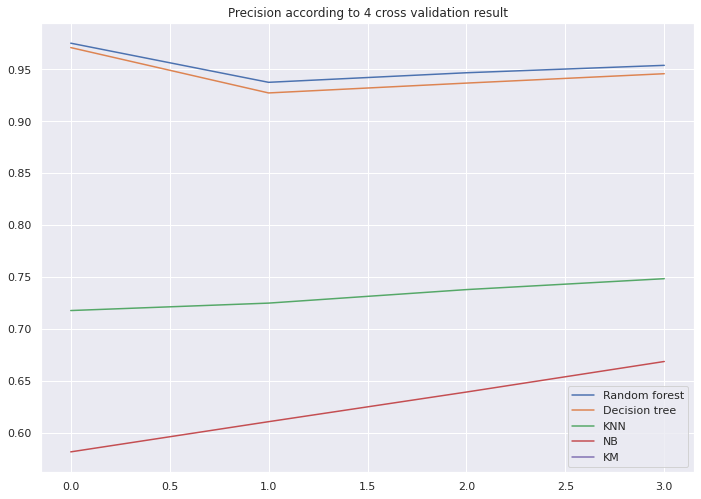

ANN precision score 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#precision
from sklearn.metrics import precision_score
RF_precision_score = scores_RF['test_precision']
DC_precision_score = scores_DC['test_precision']
KNN_precision_score = scores_KNN['test_precision']
NB_precision_score = scores_NB['test_precision']
KM_precision_score = scores_KM['test_precision']

plt.plot(RF_precision_score,label='Random forest')
plt.plot(DC_precision_score,label='Decision tree')
plt.plot(KNN_precision_score,label='KNN')
plt.plot(NB_precision_score,label='NB')
plt.plot(KM_precision_score,label='KM')
plt.legend()
plt.title("Precision according to 4 cross validation result")
plt.show()
print("ANN precision score",precision_score(y_test,ANN_pred))


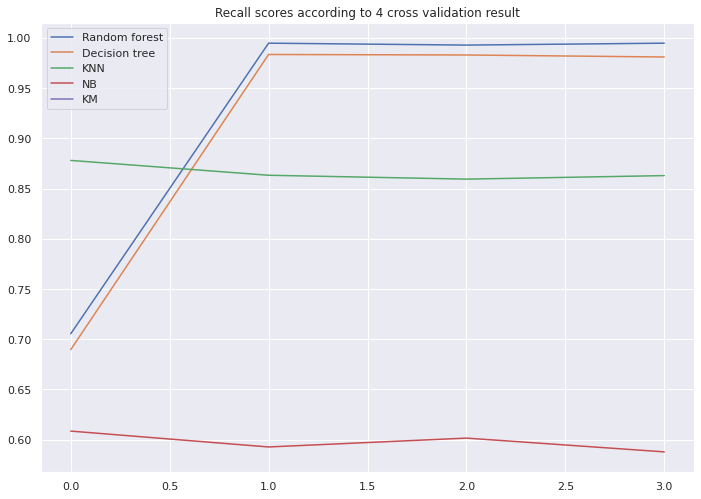

ANN recall score 0.0


In [39]:
#recall
from sklearn.metrics import recall_score
RF_recall = scores_RF['test_recall']
DC_recall = scores_DC['test_recall']
KNN_recall = scores_KNN['test_recall']
NB_recall = scores_NB['test_recall']
KM_recall = scores_KM['test_recall']
plt.plot(RF_recall,label='Random forest')
plt.plot(DC_recall,label='Decision tree')
plt.plot(KNN_recall,label='KNN')
plt.plot(NB_recall,label='NB')
plt.plot(KM_recall,label='KM')
plt.legend()
plt.title("Recall scores according to 4 cross validation result")
plt.show()
print("ANN recall score",recall_score(y_test,ANN_pred))

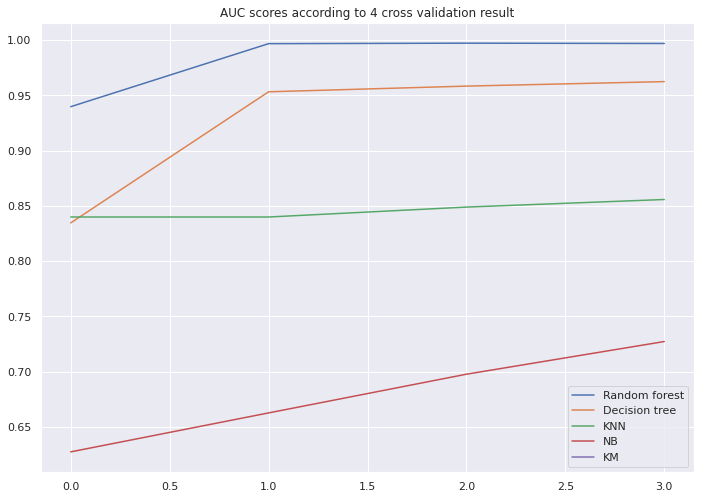

ANN auc score 0.5


In [40]:
#Roc AUC scores for each model
from sklearn.metrics import roc_auc_score

RF_roc_auc_score = scores_RF['test_roc_auc']
DC_roc_auc_score = scores_DC['test_roc_auc']
KNN_roc_auc_score = scores_KNN['test_roc_auc']
NB_roc_auc_score = scores_NB['test_roc_auc']
KM_roc_auc_score = scores_KM['test_roc_auc']

plt.plot(RF_roc_auc_score,label='Random forest')
plt.plot(DC_roc_auc_score,label='Decision tree')
plt.plot(KNN_roc_auc_score,label='KNN')
plt.plot(NB_roc_auc_score,label='NB')
plt.plot(KM_roc_auc_score,label='KM')
plt.legend()
plt.title("AUC scores according to 4 cross validation result")
plt.show()
print("ANN auc score",roc_auc_score(y_test,ANN_pred))

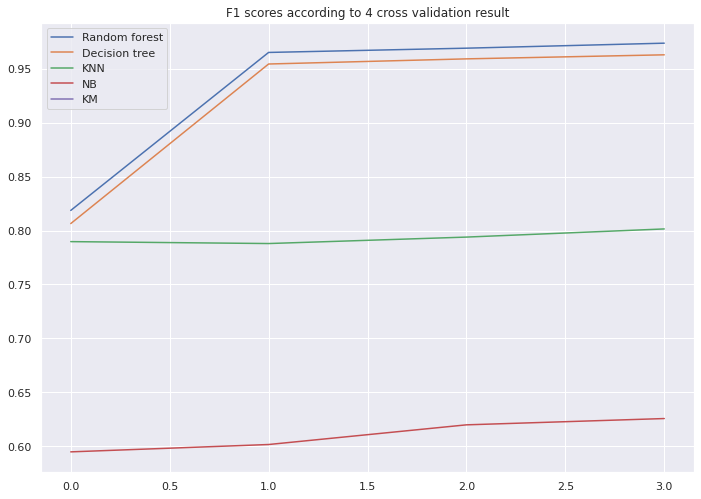

ANN f1 score 0.0


In [41]:
#f1 scores for each model
from sklearn.metrics import f1_score

RF_fbeta_score = scores_RF['test_f1']
DC_fbeta_score = scores_DC['test_f1']
KNN_fbeta_score = scores_KNN['test_f1']
NB_fbeta_score = scores_NB['test_f1']
KM_fbeta_score = scores_KM['test_f1']

plt.plot(RF_fbeta_score,label='Random forest')
plt.plot(DC_fbeta_score,label='Decision tree')
plt.plot(KNN_fbeta_score,label='KNN')
plt.plot(NB_fbeta_score,label='NB')
plt.plot(KM_fbeta_score,label='KM')
plt.legend()
plt.title("F1 scores according to 4 cross validation result")
plt.show()

print("ANN f1 score",f1_score(y_test,ANN_pred))

# **3. Results and Discussion**

<p align='justify'>In the result part, we can see that among all the classifiers Random forest classifiers performs well. Also, decision tree perfoms well. If we compare f1 score, recall, precision, auc score, Random forest is best, but We can not ignore the Decision tree. Decision Tree is doing well like random forest. I used metrics as recall, precision, f1 score, auc score and why I have discussed ealier. Some algorithm like knearest neibough, artificial neural network can not perform well in this dataset. They can not perform well if data are distributed different scale. In the relative vecocity and absolute magnitute features, they are totally diffrent and high value in compare to others. They need features scaling for performing well. We also tried to normalize the data and training the data again, it achieves more precision, recall, auc score but not much like random forest. This is why we remove this normalization for computional cost. ANN performs bad in our dataset</p>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


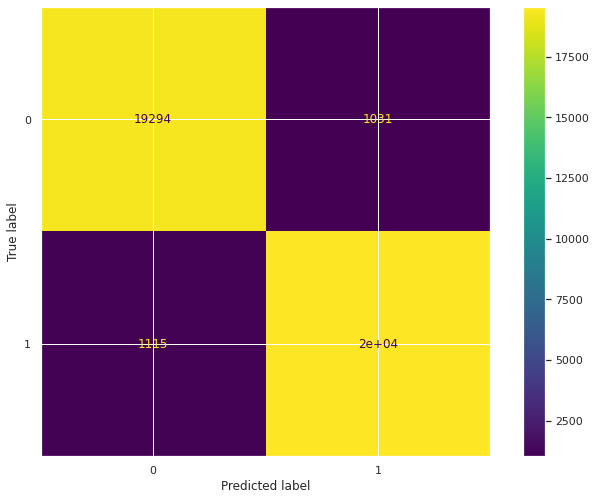

In [44]:
#ploting the confusion metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
plot_confusion_matrix(RF, x_test, y_test) 
plt.show()


## **4. Conclusion**

In our project, we implement traditional machine learning and deep learning for built our model. Among them, we suggest Random forest as best classifier for our experiment. Though there are lots of experiment for machine learning to built the best model. In our project, we do some basic experiment and follow some technique to built a good model. Though we can not say our model is best, but evaluating our model using various metrices, we can say this is enough good for classifying the hazardous object.

In [45]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html /content/drive/MyDrive/Datasets/FinalMa336Project.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Datasets/FinalMa336Project.ipynb to html
[NbConvertApp] Writing 1381315 bytes to /content/drive/MyDrive/Datasets/FinalMa336Project.html
